In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.optimize import minimize

# Exercise 1: Point Estimation

**Objective**: Estimate the population mean and variance for a dataset using sample data.


**Instructions**:
- Generate a random dataset of 1000 values from a normal distribution with a known mean and standard deviation.
- Write functions to calculate the sample mean and sample variance.
- Compare the sample mean and variance with the known population values.


**Learning Outcome**

Understanding of point estimation and how it provides a single "best guess" for population parameters.


/var/folders/5g/_0nnj_t54m30pxpk83wpms6r0000gn/T/ipykernel_4780/3871358808.py:9: RuntimeWarning: invalid value encountered in scalar divide
  sample_variance = sum_squared_diffs / (len(sample) - 1)


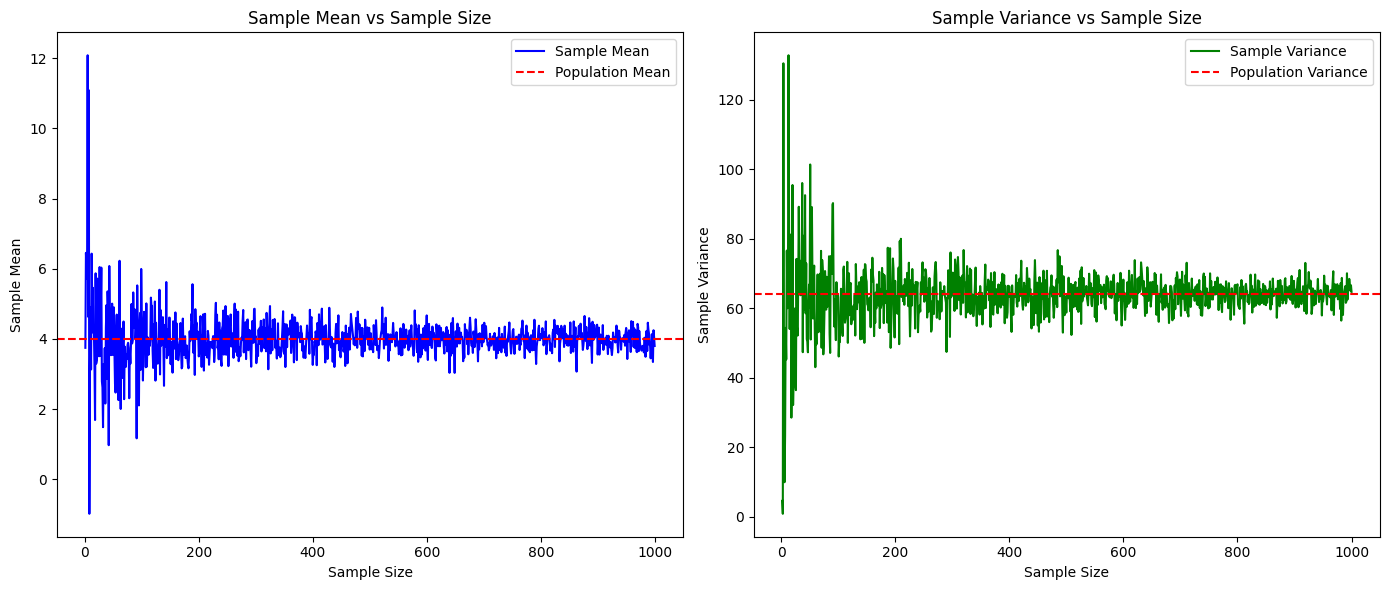

In [8]:
def calculate_sample_mean(sample: list[float]) -> float:
    sample_mean = sum(sample) / len(sample)
    return sample_mean

def calculate_sample_variance(sample: list[float]) -> float:
    sample_mean = calculate_sample_mean(sample)
    squared_diffs = [(x - sample_mean) ** 2 for x in sample]
    sum_squared_diffs = sum(squared_diffs)
    sample_variance = sum_squared_diffs / (len(sample) - 1)
    return sample_variance

POP_MEAN = 4
POP_STD = 8
POP_VARIANCE = POP_STD**2
MAX_SAMPLE_SIZE = 1000


# Initialize lists to store the running sample mean and variance
sample_sizes = np.arange(1, MAX_SAMPLE_SIZE + 1)
sample_means = []
sample_variances = []
for sample_size in sample_sizes:
    data = np.random.normal(POP_MEAN, POP_STD, sample_size)
    sample_means.append(calculate_sample_mean(data))
    sample_variances.append(calculate_sample_variance(data))


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for sample mean vs sample size
axes[0].plot(sample_sizes, sample_means, color='blue', label='Sample Mean')
axes[0].axhline(y=POP_MEAN, color='red', linestyle='--', label='Population Mean')
axes[0].set_title('Sample Mean vs Sample Size')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Sample Mean')
axes[0].legend()

# Plot for sample variance vs sample size
axes[1].plot(sample_sizes, sample_variances, color='green', label='Sample Variance')
axes[1].axhline(y=POP_VARIANCE, color='red', linestyle='--', label='Population Variance')
axes[1].set_title('Sample Variance vs Sample Size')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Sample Variance')
axes[1].legend()

plt.tight_layout()
plt.show()

**As the sample size increases, the sample mean and variance converge to the population mean and variance.**

# Exercise 2: MLE for Exponential Distribution (MLE)
**Objective:** 

Estimate parameters of a distribution using MLE.

**Instructions:**
- Generate a dataset from an exponential distribution with a known rate parameter, $\lambda$. 
- Define the likelihood function for the exponential distribution.
Write code to find the MLE for $\lambda$ using scipy.optimize to maximize the likelihood function.

**Learning Outcome**: Applying MLE to find parameter estimates that maximize the probability of observed data.

We know that the PDF of the exponential distribution is 

$$f(x; \lambda) = \lambda e^{-\lambda x}$$ 
where $x \geq 0$ and $\lambda > 0$.

Given that we have a sample of $n$ observations, $$X_1=x_1, X_2=x_2,...,X_n=x_n$$, we define the likelihood function as 

$$L(\lambda; X_1=x_2,...,X_n=x_n) = P(X_1=x_1, X_2=x_2,...,X_n=x_n; \lambda)$$

$$P(X_1=x_1)\times.....\times P(X_n=x_n) = f(x_1;\lambda)\times.....\times f(x_n;\lambda)$$
$$\prod_{i}^{n} f(x_i;\lambda)=\prod_{i}^{n} \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i}^{n} x_i}$$

$$L(\lambda; X_1=x_2,...,X_n=x_n) = \lambda^n e^{-\lambda \sum_{i}^{n} x_i}$$
$$ln(L(\lambda)) = ln(\lambda^n e^{-\lambda \sum_{i}^{n} x_i}) = nln(\lambda) - \lambda \sum_{i}^{n} x_i$$

log-likehood function:
$$ l(\lambda) = n ln(\lambda) - \lambda \sum_{i}^{n} x_i$$


minimize the negative log-likelihood function:
$$ -l(\lambda) = - (nln(\lambda) - \lambda \sum_{i}^{n} x_i)$$


$$ \frac{d}{d\lambda} -l(\lambda) = \frac{d}{d\lambda} (nln(\lambda) - \lambda \sum_{i}^{n} x_i) = \frac{n}{\lambda} - \sum_{i}^{n} x_i = 0$$


The maximum likelihood estimate for $\lambda$ is:
$$ \hat{\lambda} = \frac{n}{\sum_{i}^{n} x_i} = \frac{1}{\bar{x}}$$


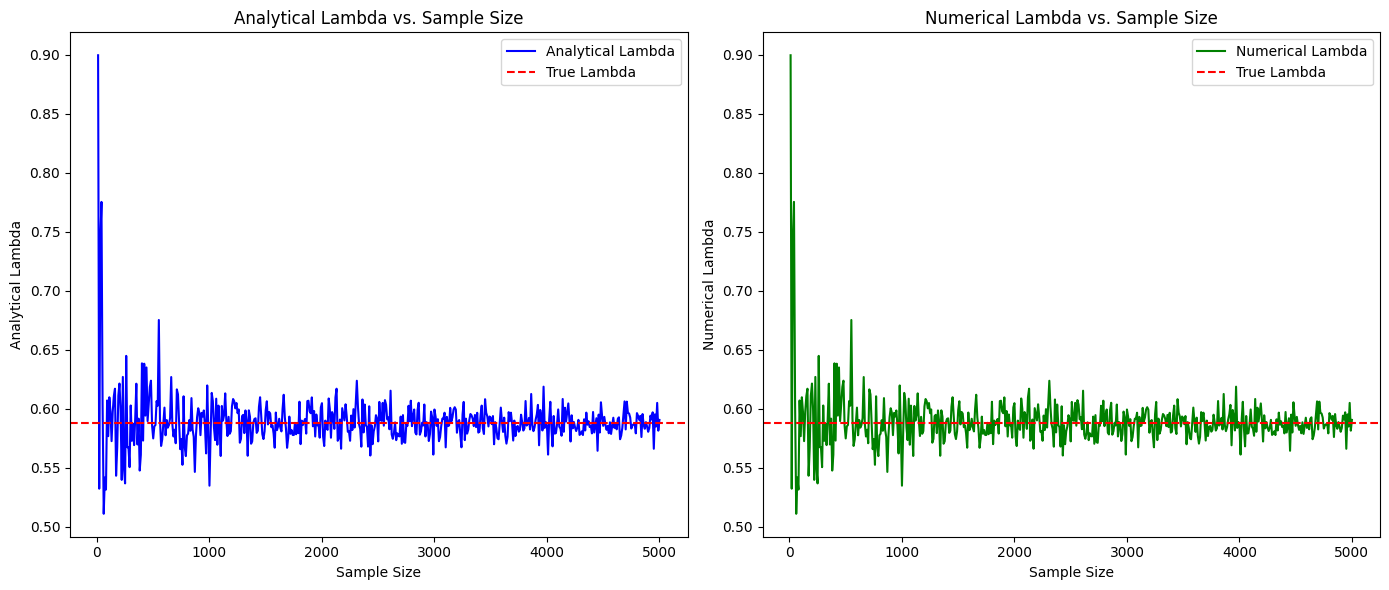

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

# True rate parameter for generating the data
true_lambda = 0.588
max_sample_size = 5000  # Generate a large enough sample size for observing the trend

# Lists to store the analytical and numerical estimates as sample size increases
sample_sizes = range(10, max_sample_size + 1, 10)  # Incrementing sample size by 10
analytical_lambdas = []
numerical_lambdas = []

# Define the negative log-likelihood function
def neg_log_likelihood(lam):
    if lam <= 0:
        return np.inf
    n = len(current_sample)
    return -(n * np.log(lam) - lam * np.sum(current_sample))

# Calculate analytical and numerical MLEs for increasing sample sizes
for n in sample_sizes:
    current_sample = np.random.exponential(1 / true_lambda, n)


    # Analytical MLE
    analytical_lambda = n / np.sum(current_sample)
    analytical_lambdas.append(analytical_lambda)
    
    # Numerical MLE
    result = optimize.minimize(neg_log_likelihood, [1.0], bounds=[(1e-6, None)])
    numerical_lambda = result.x[0]
    numerical_lambdas.append(numerical_lambda)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Analytical lambda vs. Sample size
axes[0].plot(sample_sizes, analytical_lambdas, color='blue', label='Analytical Lambda')
axes[0].axhline(y=true_lambda, color='red', linestyle='--', label='True Lambda')
axes[0].set_title('Analytical Lambda vs. Sample Size')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Analytical Lambda')
axes[0].legend()

# Graph 2: Numerical lambda vs. Sample size
axes[1].plot(sample_sizes, numerical_lambdas, color='green', label='Numerical Lambda')
axes[1].axhline(y=true_lambda, color='red', linestyle='--', label='True Lambda')
axes[1].set_title('Numerical Lambda vs. Sample Size')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Numerical Lambda')
axes[1].legend()

plt.tight_layout()
plt.show()


# Exercise 3: MLE for a Normal Distribution

- **Task**: Write a function that calculates the Maximum Likelihood Estimate (MLE) for the mean $\mu$ and standard deviation $\sigma$ of a normal distribution given a dataset.
- **Input**: A list or array of sample values from a normal distribution.
- **Output**: Estimated values of $\mu$ and $\sigma$.
- **Hint**: For a normal distribution, the MLE for the mean is the sample mean, and the MLE for the standard deviation is the sample standard deviation.

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2
$$

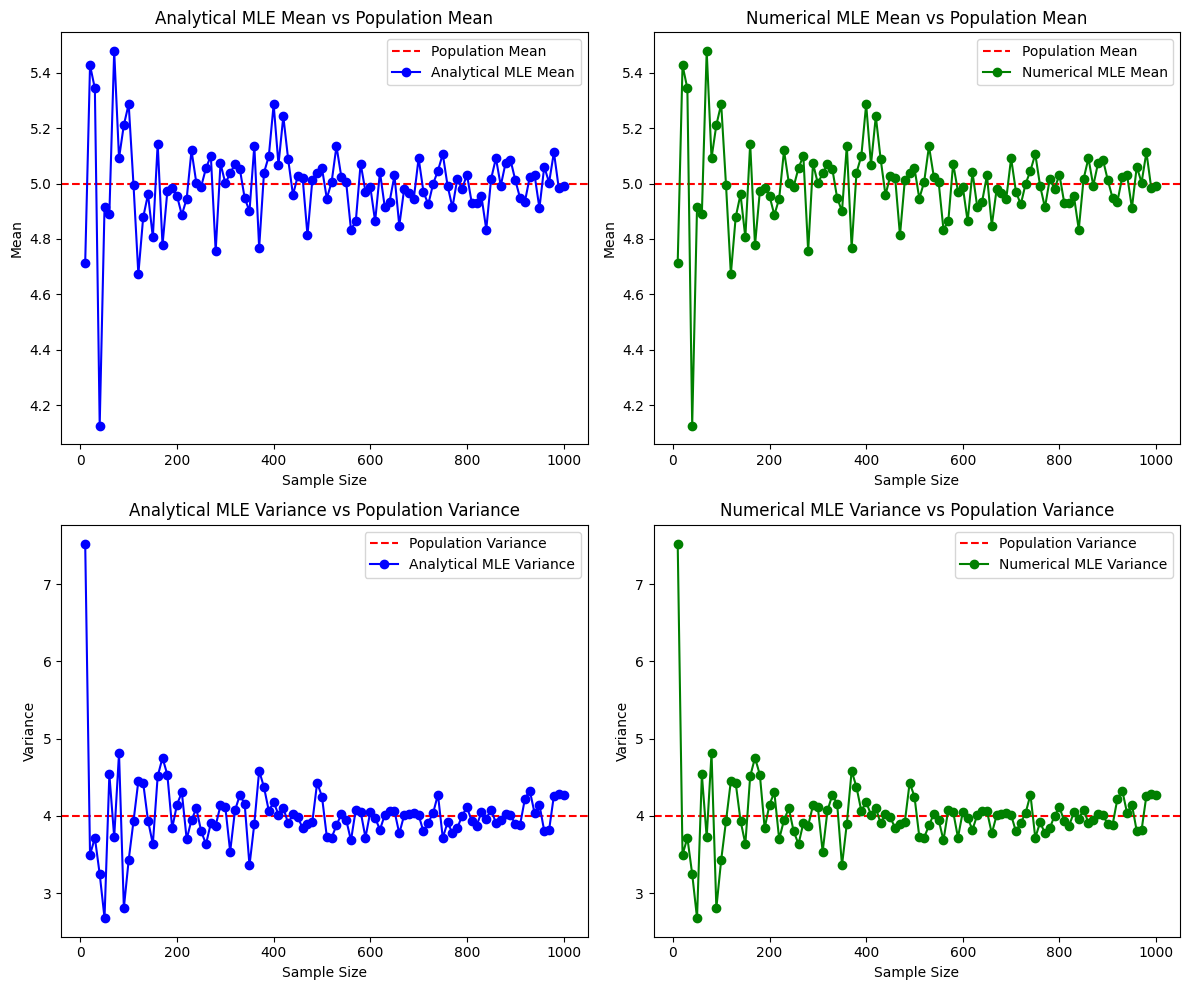

In [40]:
import scipy.optimize as optimize

# Step 1: Define the analytical MLE estimators for a normal distribution
def analytical_mle_normal(sample: list[float]) -> tuple[float, float]:
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=0)  # For MLE, use n (not n-1)
    return sample_mean, sample_variance


# Step 2: Define the negative log-likelihood for numerical optimization
def neg_log_likelihood(params, data):
    mean, var = params
    if var <= 0:  # Variance must be positive
        return np.inf
    n = len(data)
    log_likelihood = -0.5 * n * np.log(2 * np.pi * var) - 0.5 * np.sum((data - mean) ** 2) / var
    return -log_likelihood  # Return negative because we are minimizing

def numerical_mle_normal(sample: list[float]) -> tuple[float, float]:
    initial_guess = [np.mean(sample), np.var(sample, ddof=0)]
    result = optimize.minimize(neg_log_likelihood, initial_guess, args=(sample,))
    return result.x[0], result.x[1]


# Step 4: Generate a sample from a normal distribution
POP_MEAN = 5
POP_STD = 2
POP_VARIANCE = POP_STD ** 2
MAX_SAMPLE_SIZE = 1000
SAMPLE_SIZES = range(10, MAX_SAMPLE_SIZE + 1, 10)

analytical_means = []
analytical_variances = []
numerical_means = []
numerical_variances = []


for size in SAMPLE_SIZES:
    data = np.random.normal(POP_MEAN, POP_STD, size)

    # Get analytical MLE estimates
    analytical_mean, analytical_variance = analytical_mle_normal(data)
    analytical_means.append(analytical_mean)
    analytical_variances.append(analytical_variance)

    # Get numerical MLE estimates
    numerical_mean, numerical_variance = numerical_mle_normal(data)
    numerical_means.append(numerical_mean)
    numerical_variances.append(numerical_variance)

# Plot the results
plt.figure(figsize=(12, 10))

# Plot Analytical Mean
plt.subplot(2, 2, 1)
plt.axhline(y=POP_MEAN, color='r', linestyle='--', label='Population Mean')
plt.plot(SAMPLE_SIZES, analytical_means, 'bo-', label='Analytical MLE Mean')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.title('Analytical MLE Mean vs Population Mean')
plt.legend()

# Plot Numerical Mean
plt.subplot(2, 2, 2)
plt.axhline(y=POP_MEAN, color='r', linestyle='--', label='Population Mean')
plt.plot(SAMPLE_SIZES, numerical_means, 'go-', label='Numerical MLE Mean')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.title('Numerical MLE Mean vs Population Mean')
plt.legend()

# Plot Analytical Variance
plt.subplot(2, 2, 3)
plt.axhline(y=POP_VARIANCE, color='r', linestyle='--', label='Population Variance')
plt.plot(SAMPLE_SIZES, analytical_variances, 'bo-', label='Analytical MLE Variance')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Analytical MLE Variance vs Population Variance')
plt.legend()

# Plot Numerical Variance
plt.subplot(2, 2, 4)
plt.axhline(y=POP_VARIANCE, color='r', linestyle='--', label='Population Variance')
plt.plot(SAMPLE_SIZES, numerical_variances, 'go-', label='Numerical MLE Variance')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Numerical MLE Variance vs Population Variance')
plt.legend()

plt.tight_layout()
plt.show()

# Exercise 4: MLE for a Poisson Distribution

- **Task**: Given a dataset that represents the number of events in fixed intervals (e.g., a Poisson process), write a function that uses `scipy.optimize.minimize` to find the MLE for the rate parameter $\lambda$ of a Poisson distribution.
- **Input**: A list of event counts.
- **Output**: The estimated value of $\lambda$.
- **Hint**: The log-likelihood function for a Poisson distribution with rate $\lambda$ and observations $ x_1, x_2, \ldots, x_n $ is:
  $$
  \ell(\lambda) = \sum_{i=1}^n (x_i \ln(\lambda) - \lambda - \ln(x_i!))
  $$
  You can use numerical optimization on the negative log-likelihood to find the MLE for $\lambda$.


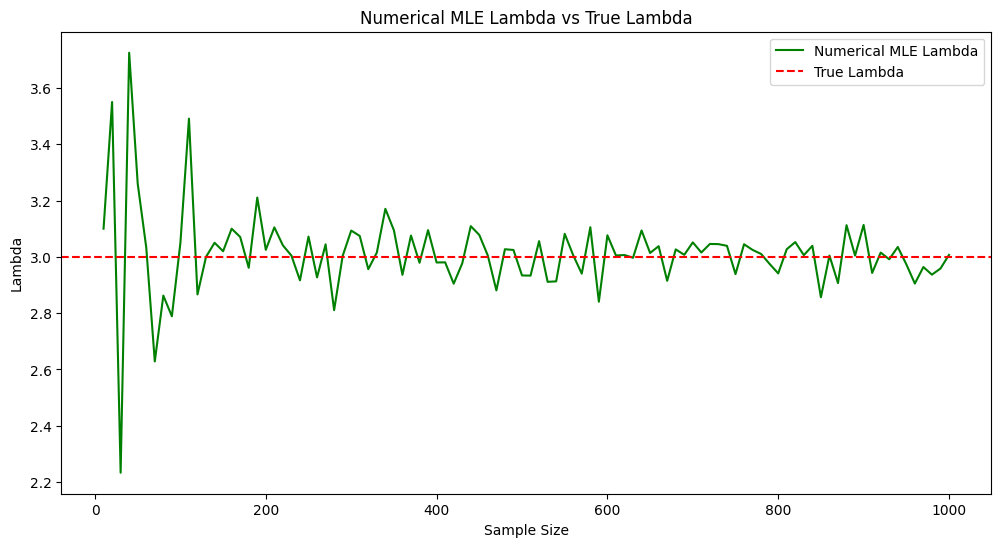

In [42]:
def neg_log_likelihood(lam, sample):  # Note: parameters order swapped to match minimize's expectations
    if lam <= 0:
        return np.inf
    # Use scalar lam value instead of array
    log_likelihood = np.sum(sample * np.log(lam[0]) - lam[0] - np.log(factorial(sample)))
    return -log_likelihood


TRUE_LAMBDA = 3
MAX_SAMPLE_SIZE = 1000
SAMPLE_SIZES = range(10, MAX_SAMPLE_SIZE + 1, 10)
numerical_lambdas = []

for size in SAMPLE_SIZES:
    data = np.random.poisson(TRUE_LAMBDA, size)
    result = minimize(neg_log_likelihood, [1.0], args=(data,))
    numerical_lambdas.append(result.x[0])

plt.figure(figsize=(12, 6))
plt.plot(SAMPLE_SIZES, numerical_lambdas, label='Numerical MLE Lambda', color='green')
plt.axhline(y=TRUE_LAMBDA, color='red', linestyle='--', label='True Lambda')
plt.title('Numerical MLE Lambda vs True Lambda')
plt.xlabel('Sample Size')
plt.ylabel('Lambda')
plt.legend()
plt.show()


# Exercise 5: Biased and Unbiased Estimation

**Objective:** Explore bias in estimators of variance.


**Instructions:**
- Generate a small sample (e.g., 10 values) from a normal distribution.
-Calculate the sample variance using np.var(data, ddof=0) and np.var(data, ddof=1).
-Repeat this process for multiple samples and calculate the average variances from both approaches.
- Compare the results to understand bias in the estimator when ddof=0.

**Learning Outcome**: Differentiate between biased and unbiased estimators for sample variance.

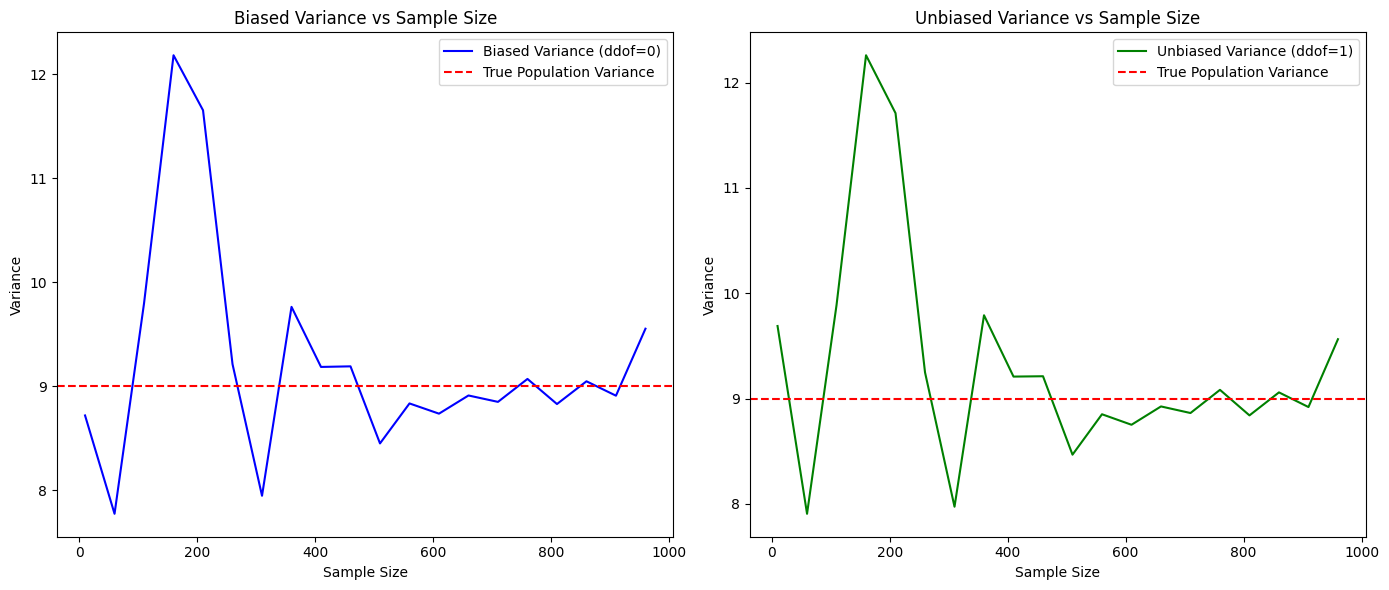

In [37]:
POP_MEAN = 2
POP_STD = 3
POP_VARIANCE = POP_STD**2
max_sample_size = 1000
biased_var_lis = []
unbiased_var_lis = []
sample_sizes = range(10, max_sample_size + 1, 50)

for sample_size in sample_sizes:
    data = np.random.normal(POP_MEAN , POP_STD, sample_size)
    biased_var = np.var(data, ddof=0)
    unbiased_var = np.var(data, ddof=1)
    biased_var_lis.append(biased_var)
    unbiased_var_lis.append(unbiased_var)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Biased Variance vs Sample Size
axes[0].plot(sample_sizes, biased_var_lis, color='blue', label='Biased Variance (ddof=0)')
axes[0].axhline(y=POP_VARIANCE, color='red', linestyle='--', label='True Population Variance')
axes[0].set_title('Biased Variance vs Sample Size')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Variance')
axes[0].legend()

# Graph 2: Unbiased Variance vs Sample Size
axes[1].plot(sample_sizes, unbiased_var_lis, color='green', label='Unbiased Variance (ddof=1)')
axes[1].axhline(y=POP_VARIANCE, color='red', linestyle='--', label='True Population Variance')
axes[1].set_title('Unbiased Variance vs Sample Size')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Variance')
axes[1].legend()

plt.tight_layout()
plt.show()

The difference between biased and unbiased sample variance becomes very small as the sample size grows due to the Law of Large Numbers:
- For large sample sizes, the sample mean is a good estimator for the population mean, reducing the need for a correction factor
- The difference between biased and unbiased variance is negligible for large sample sizes


There are noticeable fluctuations and differences between biased and unbiased estimates.
- The unbiased estimate tends to be slightly higher on average than the biased estimate, correcting for the underestimation of variance.


# Exercise 6: Method of Moments for a Uniform Distribution

- **Task**: Write a function that estimates the parameters $a$ and $b$ of a uniform distribution $U(a, b)$ using the Method of Moments.
- **Input**: A list of sample values from a uniform distribution.
- **Output**: Estimated values of $a$ and $b$.
- **Hint**: For a uniform distribution, the mean and variance are given by:
  - Mean: 
    $
    \frac{a + b}{2}
    $
  - Variance: 
    $
    \frac{(b - a)^2}{12}
    $
    
  Use these moments to solve for $a$ and $b$.

Theorectial 1st Moment, $E[X] = \frac{a + b}{2}$

Theorectial 2nd Moment, $E[X^2] = Var[X] + (E[X])^2 = \frac{(b - a)^2}{12} + (\frac{a + b}{2})^2 = \frac{a^2 + ab + b^2}{3}$

Sample 1st Moment, $ E[X]_{sample} = \frac{1}{n}\sum_{i=1}^{n} X_i$

Sample 2nd Moment, $E[X^2]_{sample} = \frac{1}{n}\sum_{i=1}^{n} X_i^2$

Equating the sample moments to the theoretical moments, we get:

$$ E[X]_{sample} = \frac{a + b}{2}  =>  a + b = 2 E[X]_{sample}  =>  \hat{a} = 2 E[X]_{sample} - b $$
$$ E[X^2]_{sample} = \frac{a^2 + ab + b^2}{3}  =>  a^2 + ab + b^2 = 3 E[X^2]_{sample}  =>  \hat{b} = E[X]_{sample} + \sqrt{3(E[X^2]_{sample} - E[X]_{sample}^2)} $$



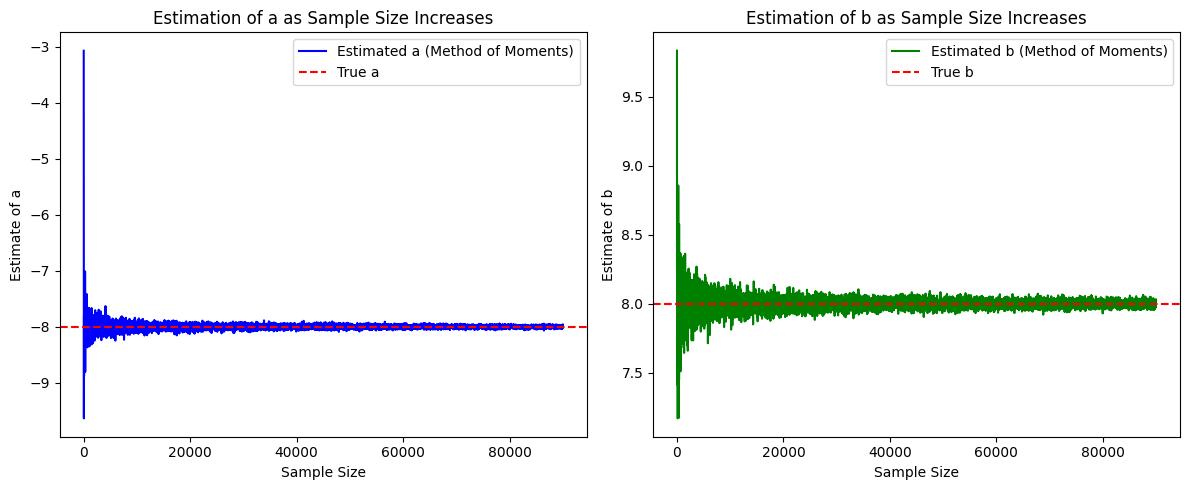

In [46]:
def get_first_sample_moments(sample):
    return np.mean(sample)

def get_second_sample_moments(sample):
    return np.mean(sample**2)

def get_mom_uniform(sample):
    sample_first_moment = get_first_sample_moments(sample)
    sample_second_moment = get_second_sample_moments(sample)
    b = sample_first_moment + np.sqrt(3 * (sample_second_moment - sample_first_moment**2))
    a = 2 * sample_first_moment - b
    return a, b

POP_A = -8
POP_B = 8
MAX_SAMPLE_SIZE = 90000
SAMPLE_SIZES = range(10, MAX_SAMPLE_SIZE + 1, 10)
mom_a_list = []
mom_b_list = []

for sample_size in SAMPLE_SIZES:
    data = np.random.uniform(POP_A, POP_B, sample_size)
    mom_a, mom_b = get_mom_uniform(data)
    mom_a_list.append(mom_a)
    mom_b_list.append(mom_b)
    
# Plotting
plt.figure(figsize=(12, 5))

# Plot for `a` estimates
plt.subplot(1, 2, 1)
plt.plot(SAMPLE_SIZES, mom_a_list, label='Estimated a (Method of Moments)', color='blue')
plt.axhline(POP_A, color='red', linestyle='--', label='True a')
plt.xlabel('Sample Size')
plt.ylabel('Estimate of a')
plt.title('Estimation of a as Sample Size Increases')
plt.legend()

# Plot for `b` estimates
plt.subplot(1, 2, 2)
plt.plot(SAMPLE_SIZES, mom_b_list, label='Estimated b (Method of Moments)', color='green')
plt.axhline(POP_B, color='red', linestyle='--', label='True b')
plt.xlabel('Sample Size')
plt.ylabel('Estimate of b')
plt.title('Estimation of b as Sample Size Increases')
plt.legend()

plt.tight_layout()
plt.show()

# Exercise 7: Method of Moments for a Poisson Distribution

**Objective:** Use the Method of Moments to estimate parameters of a distribution.

**Instructions:**
- Generate a dataset from a Poisson distribution with a known mean $\lambda$.
- Use the method of moments to estimate $\lambda$ (for a Poisson distribution, the sample mean is an estimator for $\lambda$).
- Compare the method of moments estimate with the true parameter value. 
- Compare the method of moments estimate with the MLE estimate.

- Hint: The sample mean, $ \bar{X} $ is an estimator for $\lambda$ for a Poisson distribution.

**Learning Outcome**: Gain insight into the method of moments and how sample moments relate to distribution parameters.


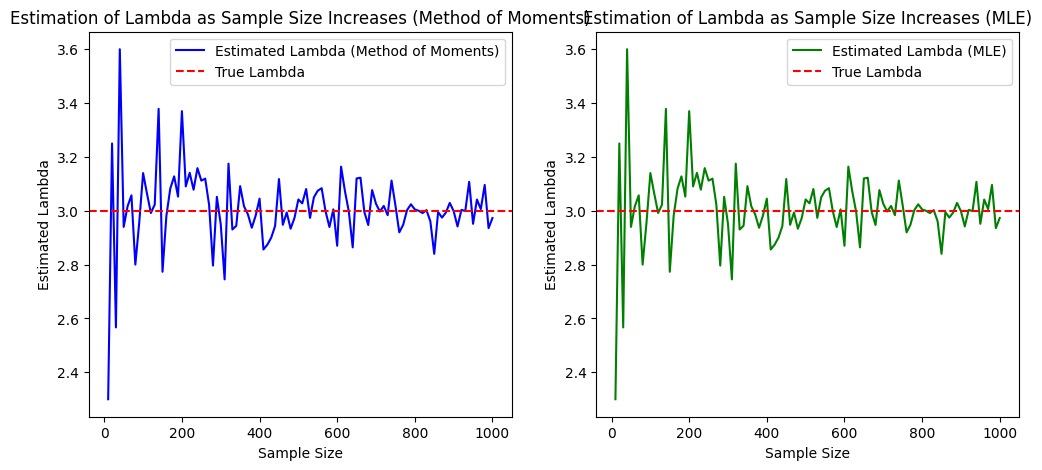

In [4]:
def get_first_sample_moment_poisson(sample):
    return np.mean(sample)

def get_second_sample_moment_poisson(sample):
    return np.mean(sample**2)

def get_lam_mom(sample):
    sample_first_moment = get_first_sample_moment_poisson(sample)
    lam = sample_first_moment
    return lam

def neg_log_likelihood(lam, sample):  # Note: parameters order swapped to match minimize's expectations
    if lam <= 0:
        return np.inf
    # Use scalar lam value instead of array
    log_likelihood = np.sum(sample * np.log(lam[0]) - lam[0] - np.log(factorial(sample)))
    return -log_likelihood

def get_lam_mle(sample):
    result = minimize(neg_log_likelihood, [1.0], args=(sample,))
    return result.x[0]


TRUE_LAMBDA = 3
MAX_SAMPLE_SIZE = 1000
SAMPLE_SIZES = range(10, MAX_SAMPLE_SIZE + 1, 10)
mom_lambdas = []
mle_lambdas = []

for size in SAMPLE_SIZES:
    data = np.random.poisson(TRUE_LAMBDA, size)
    mom_lambdas.append(get_lam_mom(data))
    mle_lambdas.append(get_lam_mle(data))
    
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(SAMPLE_SIZES, mom_lambdas, label='Estimated Lambda (Method of Moments)', color='blue')
plt.axhline(TRUE_LAMBDA, color='red', linestyle='--', label='True Lambda')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Lambda')
plt.title('Estimation of Lambda as Sample Size Increases (Method of Moments)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(SAMPLE_SIZES, mle_lambdas, label='Estimated Lambda (MLE)', color='green')
plt.axhline(TRUE_LAMBDA, color='red', linestyle='--', label='True Lambda')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Lambda')
plt.title('Estimation of Lambda as Sample Size Increases (MLE)')
plt.legend()
plt.show()

# [NOT DONE] Exercise 8: Method of Moments for a Binomial Distribution

- **Task**: Write a function that estimates the parameters $n$ (number of trials) and $p$ (probability of success) of a binomial distribution using the Method of Moments.
- **Input**: A list of sample values representing counts of successes in repeated trials.
- **Output**: Estimated values of $n$ and $p$.
- **Hint**: Use the sample mean and variance to derive the equations for $n$ and $p$. For a binomial distribution:
  - Mean:
    $$
    \text{Mean} = np
    $$
  - Variance:
    $$
    \text{Variance} = np(1 - p)
    $$
  Using these two equations, solve for $n$ and $p$ based on the sample mean and variance.


In [ ]:
def get_estimates_for_binomial_mom(sample):
    M1 = np.mean(sample)
    M2 = np.mean(sample**2)
    p = 1 - (M1**2 + M2)/M1
    n = M1/p
    return p, n

TRUE_P = 0.8
TRUE_N = 

IndentationError: expected an indented block (3311457340.py, line 1)

# Exercise 9: Method of Moments for a Gamma Distribution

**Objective:** Use the Method of Moments to estimate parameters for a Gamma distribution.

**Instructions:**
- Generate data from a Gamma distribution with shape and scale parameters.
- Use the sample mean and variance to derive estimates for the Gamma distribution parameters using the method of moments.
- Compare these estimates to the true parameters.


**Learning Outcome:** Practice applying method of moments for continuous distributions beyond simple Poisson or Normal.

We know for a Gamma distribution, 
$$ E[X] = \alpha \beta $$ 
$$ E[X^2] = Var[X] + E[X]^2 = \alpha \beta^2 + \alpha^2 \beta^2 = \alpha \beta (\beta + \alpha \beta)$$

Let the sample first moment be 
$$M_1 =\frac{1}{n} \sum_{i}^{n} X_i $$ 

and the second sample moment be 
$$M_2 = \frac{1}{n} \sum_{i}^{n}X_i^2 $$

Equating the first moment to the first sample moment we get:
$$ \alpha \beta = M_1 $$
$$ \beta = \frac{M_1}{\alpha} $$

Equating the second moment to the second sample moment we get:

 $$\alpha \beta (\beta + \alpha \beta) = M_2 $$
 
 Subbing in $\beta = \frac{M_1}{\alpha}$, we end up with the expression:
 $$ \alpha = \frac{M_1^2}{M_2 - M_1^2}$$

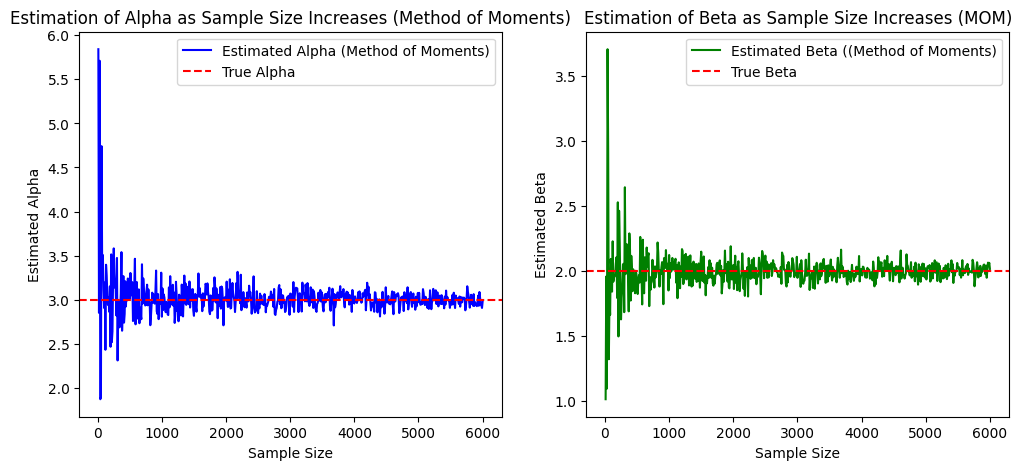

In [5]:
def get_estimates_for_gamma_mom(sample):
    M1 = np.mean(sample)
    M2 = np.mean(sample**2)
    alpha_estimate = (M1**2)/(M2 - M1**2)
    beta_estimate = M1 / alpha_estimate
    return alpha_estimate, beta_estimate

TRUE_ALPHA = 3
TRUE_BETA = 2
MAX_SAMPLE_SIZE = 6000
SAMPLE_SIZES = range(10, MAX_SAMPLE_SIZE + 1, 10)
alpha_lis, beta_lis = [], []
for sample_size in SAMPLE_SIZES:
    data = np.random.gamma(TRUE_ALPHA, TRUE_BETA, sample_size)
    alpha_estimate, beta_estimate = get_estimates_for_gamma_mom(data)
    alpha_lis.append(alpha_estimate)
    beta_lis.append(beta_estimate)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(SAMPLE_SIZES, alpha_lis, label='Estimated Alpha (Method of Moments)', color='blue')
plt.axhline(TRUE_ALPHA, color='red', linestyle='--', label='True Alpha')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Alpha')
plt.title('Estimation of Alpha as Sample Size Increases (Method of Moments)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(SAMPLE_SIZES, beta_lis, label='Estimated Beta ((Method of Moments)', color='green')
plt.axhline(TRUE_BETA, color='red', linestyle='--', label='True Beta')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Beta')
plt.title('Estimation of Beta as Sample Size Increases (MOM)')
plt.legend()
plt.show()  